# Imports

In [40]:
# pdf scanner
import PyPDF2
from pypdf import PdfReader
import pdfminer
# arrays
import pandas as pd
import numpy as np
# os
import os
# NLP
    # regex
import re
    # unicode
import unidecode
import wrangle as w

import statistics
# viz
import matplotlib.pyplot as plt

## ✅ Pulling Images (only required once)

In [2]:
# pulling images from pdf 

#w.pull_images(pdf='data.pdf')

# Retrieving data from all pdfs

## Not using isolated pdf version of retrieval

### Proceeding with compiled PDF, code remains for documentation purposes

In [3]:
bodies = w.pull_text(pdf='data.pdf')

Number of pages: 219
Page 1:
data.pdf
Successfully pulled text from page.

Page 2:
data.pdf
Successfully pulled text from page.

Page 3:
data.pdf
Successfully pulled text from page.

Page 4:
data.pdf
Successfully pulled text from page.

Page 5:
data.pdf
Successfully pulled text from page.

Page 6:
data.pdf
Successfully pulled text from page.

Page 7:
data.pdf
Successfully pulled text from page.

Page 8:
data.pdf
Successfully pulled text from page.

Page 9:
data.pdf
Successfully pulled text from page.

Page 10:
data.pdf
Successfully pulled text from page.

Page 11:
data.pdf
Successfully pulled text from page.

Page 12:
data.pdf
Successfully pulled text from page.

Page 13:
data.pdf
Successfully pulled text from page.

Page 14:
data.pdf
Successfully pulled text from page.

Page 15:
data.pdf
Successfully pulled text from page.

Page 16:
data.pdf
Successfully pulled text from page.

Page 17:
data.pdf
Successfully pulled text from page.

Page 18:
data.pdf
Successfully pulled text from page.

In [4]:
clean_body = w.clean_bodies(bodies)

In [5]:
# separating each entry by artist name
names = ['Zhang Daqian', 'Andy Warhol', 'Banksy', 'Salvador Dali','Marc Chagall','Pablo Picasso',
         'Rembrandt van Rijn','KAWS','Leonard Tsuguharu Foujita','Yayoi Kusama']
# container for all entries
new_body = []
# container for each artist that has multiple names in the entry
banksy_clean = []
marc_clean = []
pablo_clean = []
rembrandt_clean = []
dali_clean = []
kaws_clean = []
for body in clean_body :
    for name in names:

        # isolating the entries that contain multiple counts of name in entry
            # the text in the if statement is the combined text where the name is repeated
            # these varie between title of piece or within the lot description

        # KAWS
        if name == 'KAWS':
            if 'Banksy and 21st Century Editions' in body:
                kaws_clean.append(body)
        else:
            pass
                
        # Banksy 
        if name == 'Banksy':
            if 'Only Banksy' in body:
                banksy_clean.append(body)
            elif 'Banksy and 21st Century Editions' in body:
                banksy_clean.append(body)
        else:
            pass

        # Marc Chagall
        if name == 'Marc Chagall':
            if 'Colour of Life' in body:
                marc_clean.append(body)
            elif 'After Marc Chagall':
                marc_clean.append(body)
        else:
            pass

        # Dali
        if name == 'Salvador Dali':
            if 'After Salvador Dali' in body:
                dali_clean.append(body)
            elif 'SALVADOR DALI\' "Genesis"' in body:
                dali_clean.append(body)
            elif 'Currier & Ives as Interpreted by Salvador Dali' in body:
                dali_clean.append(body)
        else:
            pass
        
        # Picasso
        if name == 'Pablo Picasso':
            if 'After Pablo Picasso' in body:
                pablo_clean.append(body)

        # Rembrandt
        if name == 'Rembrandt van Rijn':
            if 'School of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Circle of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Studio of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Follower of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)

        # All other values that do not have repeated names
        else:
            entries = body.split(f"{name}")[1:]
        for entry in entries:
            entry = entry.strip()
            # adding an additional space back in between the name and piece_name
            a = ''.join([name+' ',entry])
            a = a.replace('\x00','-')
            new_body.append(a)
            print(a)
            print("="*30)


Banksy Sale Ends (V.2)screenprint in colors on wove paperHeight 56.01 x Width 76 cm.Height 22.05 x Width 29.92 in.2017Edition: Edition 238/50015 December 202211 months agoartnet AuctionsContemporary Finds - [Lot 138555]est. 20,000 u 30,000 USD30,000USD
Banksy Donuts (Strawberry)screenprint in coloursHeight 55.6 x Width 75.8 cm.Height 21.89 x Width 29.843 in.2009Edition: 281/29913 December 202211 months agoBonhams LondonPrints and Multiples - [Lot 00086]est. 20,000 u 30,000 GBP29,595GBPest. 24,749 u 37,124 USD36,622USD
Banksy Napalmscreenprint in coloursHeight 50 x Width 70 cm.Height 19.685 x Width 27.559 in.2005Edition: 58/15013 December 202211 months agoBonhams LondonPrints and Multiples - [Lot 00085]est. 20,000 u 30,000 GBP25,500GBPest. 24,749 u 37,124 USD31,555USD
Banksy NOLA (Green/Blue)screenprint in colorsHeight 76 x Width 56 cm.Height 29.921 x Width 22.047 in.2008Edition: AP aside from ed. 28913 December 202211 months agoForum AuctionsThe British Sale (with Dreweatts 1759) - [Lo

In [6]:
# Removing Marc Chagall due to complications with the data but also replacing
new_body = [entry for entry in new_body if 'Marc Chagall' not in entry]

## Isolated Lists of Entries that have the name of artist within the data.

### KAWS

In [7]:
kaws_ = w.kaws(kaws_clean)

### Banksy

In [8]:
banksy_ = w.banksy(banksy_clean)

### Rembrandt

In [9]:
rembrandt_ = w.rembrandt(rembrandt_clean)

### Marc Chagall

In [10]:
marc_ = w.marc(marc_clean)

### Pablo Picasso

In [11]:
pablo_ = w.pablo(pablo_clean)

### Salvador Dali

In [12]:
dali_ = w.dali(dali_clean)

## Connecting multiple name counts with the rest of values that did not need extra cleaning

In [13]:
# combing all cleaned entries
add_ins = dali_ + rembrandt_ + marc_ + pablo_ + banksy_ + kaws_
len(add_ins)

200

## Joining body with those that had multiple name entries bodies

In [14]:
new_body = w.add_ins(new_body,add_ins)

Before adding additional values: 950
After adding additional values: 1119
Some prep work before regex.
Before: 1119
After: 1065


### Counting multiple name artist entries

In [15]:
count_addins = {}
for artist in names:
    for body in add_ins:
        if artist in body:
            if artist in count_addins:
                count_addins[artist] += 1
            else:
                count_addins[artist] = 1

In [16]:
pd.DataFrame([count_addins], index=['count']).T.sort_values(by='count',ascending=False)

,count
Marc Chagall,100
Rembrandt van Rijn,40
Banksy,37
Pablo Picasso,15
Salvador Dali,7
KAWS,1


In [17]:
count_artist = {}
for artist in names:
    for body in new_body:
        if artist in body:
            if artist in count_artist:
                count_artist[artist] += 1
            else:
                count_artist[artist] = 1

In [18]:
# Data Frame to see distribution of a
pd.DataFrame([count_artist], index=['count']).T.sort_values(by='count',ascending=False)

,count
Rembrandt van Rijn,139
Banksy,122
Salvador Dali,103
Pablo Picasso,102
Zhang Daqian,100
Andy Warhol,100
Marc Chagall,100
KAWS,100
Leonard Tsuguharu Foujita,100
Yayoi Kusama,100


In [19]:
# seperating by IF has foreign currency
foreign_currency = ['HKD','EUR','NZD','AUD','GBP','KRW','CNY','JPY','CHF','SGD','CAD','TWD','INR','THB','RUB','SEK','DKK','NOK',
                    'PLN','ZAR','MXN','BRL','TRY','AED','SAR','QAR','KWD','OMR','BHD','JOD','ILS','EGP','IDR','MYR','PHP','CZK',
                    'HUF','CLP','ARS','COP','PEN']
# seperating by IF has depth
# Depth as a keyword

In [20]:
# new_body with foreign currency
has_foreign_currency = [body for body in new_body if any(currency in body for currency in foreign_currency)]

# new_body without foreign currency
no_foreign_currency = []
for body in new_body:
    if body not in has_foreign_currency:
        no_foreign_currency.append(body)

In [21]:
print(f'Length of FC: {len(has_foreign_currency)},\
 Length of No FC: {len(no_foreign_currency)},\
 Combined = {len(has_foreign_currency) + len(no_foreign_currency)}')

Length of FC: 793, Length of No FC: 272, Combined = 1065


# Regex

## Working with Foreign Currency Data

In [22]:
# Foreign currency values DataFrame
fc_df = w.regex_foreign_currency(has_foreign_currency)

In [23]:
# Non-Foreign currency values in DataFrame
no_fc_df = w.no_foreign_currency_regex(no_foreign_currency)

In [24]:
# Combining our seperate DataFrames
df = pd.concat([fc_df,no_fc_df])

In [25]:
# Cleaning data where necessary -- such as:
    # 1. Changing dtypes
    # 2. Fixing individual artists
    # 3. Dropping unused columns
    # 4. Fixing values of percent_estimate
    # 5. 
df = w.clean_prep_df(df)

In [26]:
df

,artist,dimension_cm,dimension_in,year_created,date_sold,auction_house,estimate_usd_low,estimate_usd_high,hammer_price,percent_estimate,...,is_other_format,is_ink,is_paint,is_pencil,is_pottery,is_other_medium,is_sothebys,is_christies,is_phillips,is_bonhams
0,Banksy,Height 55.6 x Width 75.8 cm,Height 55.6 x Width 75.8 cm.Height 21.89 x Wid...,2009,December 2022,Bonhams LondonPrints and Multiples -,24749.0,37124.0,36622.0,NaN,...,0,0,0,0,0,0,0,0,0,1
1,Banksy,Height 50 x Width 70 cm,Height 50 x Width 70 cm.Height 19.685 x Width ...,2005,December 2022,Bonhams LondonPrints and Multiples -,24749.0,37124.0,31555.0,NaN,...,0,0,0,0,0,0,0,0,0,1
2,Banksy,Height 76 x Width 56 cm,Height 76 x Width 56 cm.Height 29.921 x Width ...,2008,December 2022,Forum AuctionsThe British Sale (with Dreweatts...,148496.0,185620.0,136121.0,-8.0,...,0,0,0,0,0,0,0,0,0,0
3,Banksy,Height 70.7 x Width 49.7 cm,Height 70.7 x Width 49.7 cm.Height 27.835 x Wi...,2003,December 2022,Forum AuctionsThe British Sale (with Dreweatts...,19799.0,24749.0,24749.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Banksy,Height 70 x Width 50 cm,Height 70 x Width 50 cm.Height 27.559 x Width ...,2003,December 2022,Tate Ward AuctionsUrban & Contemporary Art -,17071.0,21948.0,21338.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Marc Chagall,Height 18 x Width 15 cm,Height 18 x Width 15 cm.Height 7.087 x Width 5...,1974,September 2022,HindmanPrints & Multiples -,6000.0,8000.0,11250.0,41.0,...,0,0,0,0,0,0,0,0,0,0
977,Marc Chagall,Height 48.9 x Width 70.49 cm,Height 48.9 x Width 70.49 cm.Height 19.25 x Wi...,2429,November 2022,"Abell20th Century Design, November 29th -",20000.0,30000.0,19000.0,-5.0,...,0,0,0,0,0,0,0,0,0,0
978,Marc Chagall,Height 50.8 x Width 36.83 cm,Height 50.8 x Width 36.83 cm.Height 20 x Width...,2429,November 2022,"Abell20th Century Design, November 29th -",20000.0,30000.0,15000.0,-25.0,...,0,0,0,0,0,0,0,0,0,0
979,Pablo Picasso,Height 194.31 x Width 220.98 cm,Height 194.31 x Width 220.98 cm.Height 76.5 x ...,1965,December 2022,"Neal Auction CompanyMid-Century, Modern, Conte...",2000.0,3000.0,12800.0,327.0,...,1,0,0,0,0,1,0,0,0,0


In [27]:
df.tail(2)

,artist,dimension_cm,dimension_in,year_created,date_sold,auction_house,estimate_usd_low,estimate_usd_high,hammer_price,percent_estimate,...,is_other_format,is_ink,is_paint,is_pencil,is_pottery,is_other_medium,is_sothebys,is_christies,is_phillips,is_bonhams
979,Pablo Picasso,Height 194.31 x Width 220.98 cm,Height 194.31 x Width 220.98 cm.Height 76.5 x ...,1965,December 2022,"Neal Auction CompanyMid-Century, Modern, Conte...",2000.0,3000.0,12800.0,327.0,...,1,0,0,0,0,1,0,0,0,0
980,Pablo Picasso,Height 29.21 x Width 22.86 x Depth 13.97 cm,Height 29.21 x Width 22.86 x Depth 13.97 cm.He...,3502,November 2022,"Abell20th Century Design, November 29th -",12000.0,18000.0,17000.0,NaN,...,0,0,0,0,1,0,0,0,0,0


## Calculating average estimations

In [28]:
num_estimate = []
for num in df.percent_estimate:
    if num != np.NaN:
        num_estimate.append(num)

In [29]:
mean_estimate = df.percent_estimate.sum() / len(df.percent_estimate)

In [30]:
mean_estimate

51.17940876656473

## Baselines

In [31]:
df.hammer_price.mean()

95230.31702344546

In [32]:
df.hammer_price.median()

32366.0

<Axes: ylabel='Frequency'>

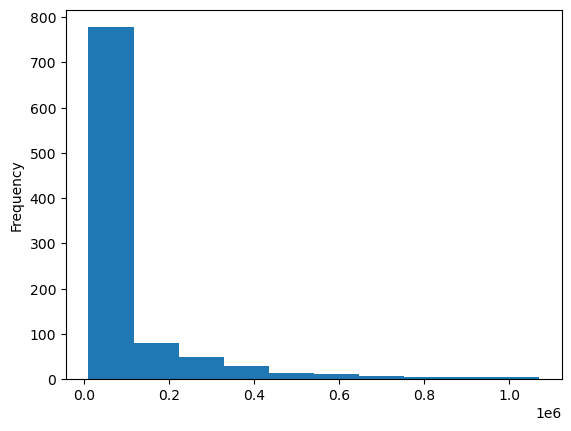

In [33]:
df.hammer_price.plot(kind='hist')

In [34]:
train, validate, test = w.splitter(df)

Dataframe: (981, 25) 100%
Train: (588, 25) | ~60%
Validate: (196, 25) | ~20%
Test: (197, 25) | ~20%


In [36]:
# scaling - requires only numerical data - next step
w.QuickScale(train, validate, test,linear=False,scaler='Quantile')

ValueError: could not convert string to float: 'Marc Chagall'

In [35]:
x_train = train.drop(columns='hammer_price')
x_validate = validate.drop(columns='hammer_price')
x_test = test.drop(columns='hammer_price')

y_train = train[['hammer_price']]
y_validate = validate[['hammer_price']]
y_test = test[['hammer_price']]

In [37]:
from sklearn.preprocessing import QuantileTransformer

# Initialize the transformer
qt = QuantileTransformer(n_quantiles=10, random_state=4343)

# Fit and transform your data
# Assume X is your data
X_trans = qt.fit_transform(df[['hammer_price']])

In [38]:
X_trans

array([[0.53968523],
       [0.48233704],
       [0.80105341],
       [0.39083952],
       [0.33796318],
       [0.20855193],
       [0.47710813],
       [0.47710813],
       [0.24695501],
       [0.34458241],
       [0.80295477],
       [0.79035072],
       [0.9535712 ],
       [0.97935118],
       [0.38626652],
       [0.74537753],
       [0.67865639],
       [0.44297178],
       [0.68553176],
       [0.68553176],
       [0.54939606],
       [0.899834  ],
       [0.87116677],
       [0.45929363],
       [0.1727234 ],
       [0.82484605],
       [0.68966805],
       [0.33523488],
       [0.45014871],
       [0.67735144],
       [0.78444444],
       [0.28217894],
       [0.408713  ],
       [0.45094096],
       [0.62795162],
       [0.93109633],
       [0.9888394 ],
       [0.94089883],
       [0.93514591],
       [0.88957631],
       [0.36510668],
       [0.66737582],
       [0.58678866],
       [0.72308531],
       [0.46194204],
       [0.33475432],
       [0.693372  ],
       [0.684

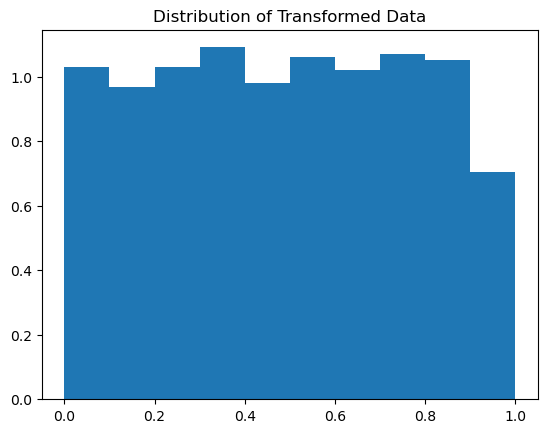

In [41]:
# distribution after transformation
plt.hist(X_trans, bins=10, density=True)
plt.title('Distribution of Transformed Data')
plt.show()